# EDA on COVID19 data in Canada

In [25]:
%load_ext lab_black

# Data manipulation
import numpy as np
import pandas as pd

pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 500

# Data viz
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

sns.set(style="darkgrid", rc={"figure.figsize": (11.7, 8.27)})

# Other
import os
import sys

# Custom module
module_path = os.path.abspath(os.path.join("../"))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.plotting import plot_predictions
from src.utils import get_covid_data, get_all_covid_data

# Reload imported code
%reload_ext autoreload
%autoreload 2

# Print all output
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


## Purpose

This notebook contains some data visualizations and other EDA on the Canada covid-19 data. The data is taken from https://github.com/ishaberry/Covid19Canada.

In [26]:
# # Read in data
active_cases_provinces = get_all_covid_data(level="prov")

# Get first and last day of reports
start_date = active_cases_provinces["date"].min()
end_date = active_cases_provinces["date"].max()

# Get list of provinces
provinces = active_cases_provinces["province"].unique()
provinces = ["Ontario", "Quebec", "BC", "Alberta"]

# Show dataframe
active_cases_provinces.head(10)

,province,date,cumulative_cases,cumulative_recovered,cumulative_deaths,active_cases,active_cases_change,deaths,recovered,cases,population,removed,susceptible,percent_susceptible
0,Alberta,2020-01-25,0,0,0,0,0,0,0,0,4421876,0,4421876,1.0
1,Alberta,2020-01-26,0,0,0,0,0,0,0,0,4421876,0,4421876,1.0
2,Alberta,2020-01-27,0,0,0,0,0,0,0,0,4421876,0,4421876,1.0
3,Alberta,2020-01-28,0,0,0,0,0,0,0,0,4421876,0,4421876,1.0
4,Alberta,2020-01-29,0,0,0,0,0,0,0,0,4421876,0,4421876,1.0
5,Alberta,2020-01-30,0,0,0,0,0,0,0,0,4421876,0,4421876,1.0
6,Alberta,2020-01-31,0,0,0,0,0,0,0,0,4421876,0,4421876,1.0
7,Alberta,2020-02-01,0,0,0,0,0,0,0,0,4421876,0,4421876,1.0
8,Alberta,2020-02-02,0,0,0,0,0,0,0,0,4421876,0,4421876,1.0
9,Alberta,2020-02-03,0,0,0,0,0,0,0,0,4421876,0,4421876,1.0


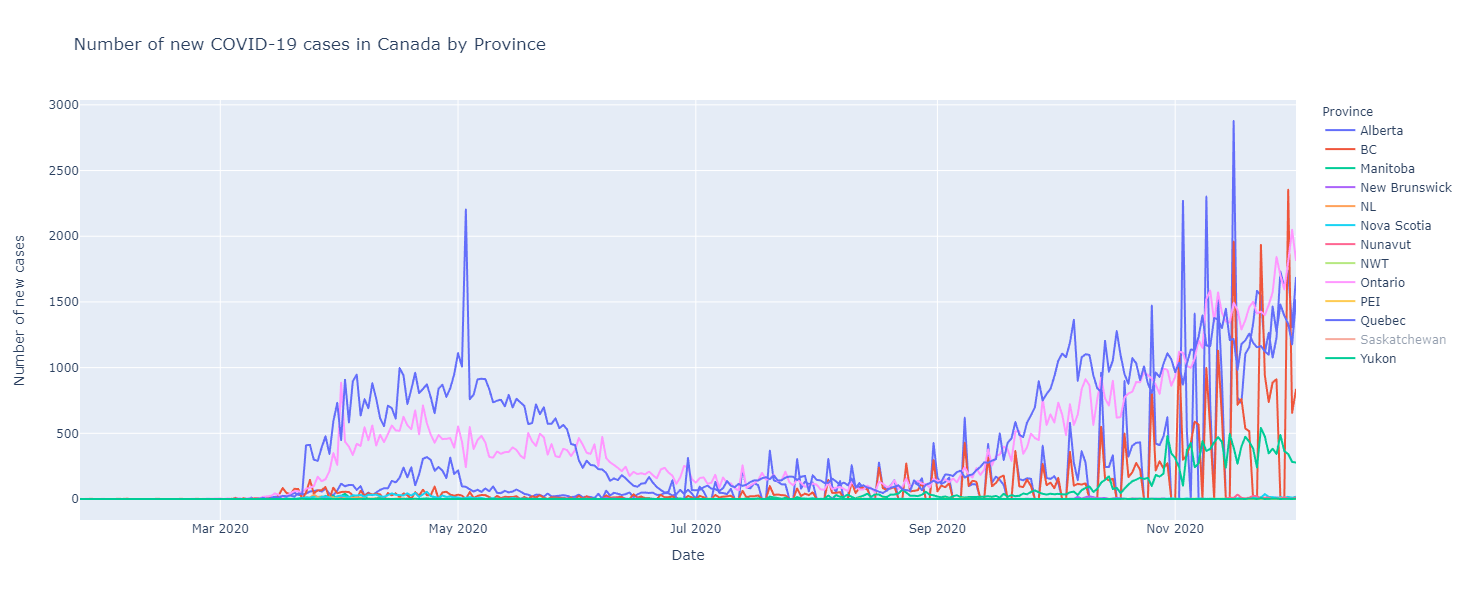

In [27]:
# Plot Y_it new cases for each province
fig = px.line(
    active_cases_provinces,
    x="date",
    y="cases",
    color="province",
    title="Number of new COVID-19 cases in Canada by Province",
    labels=dict(
        date="Date",
        cases="Number of new cases",
        province="Province",
    ),
    height=600,
)
fig.show()

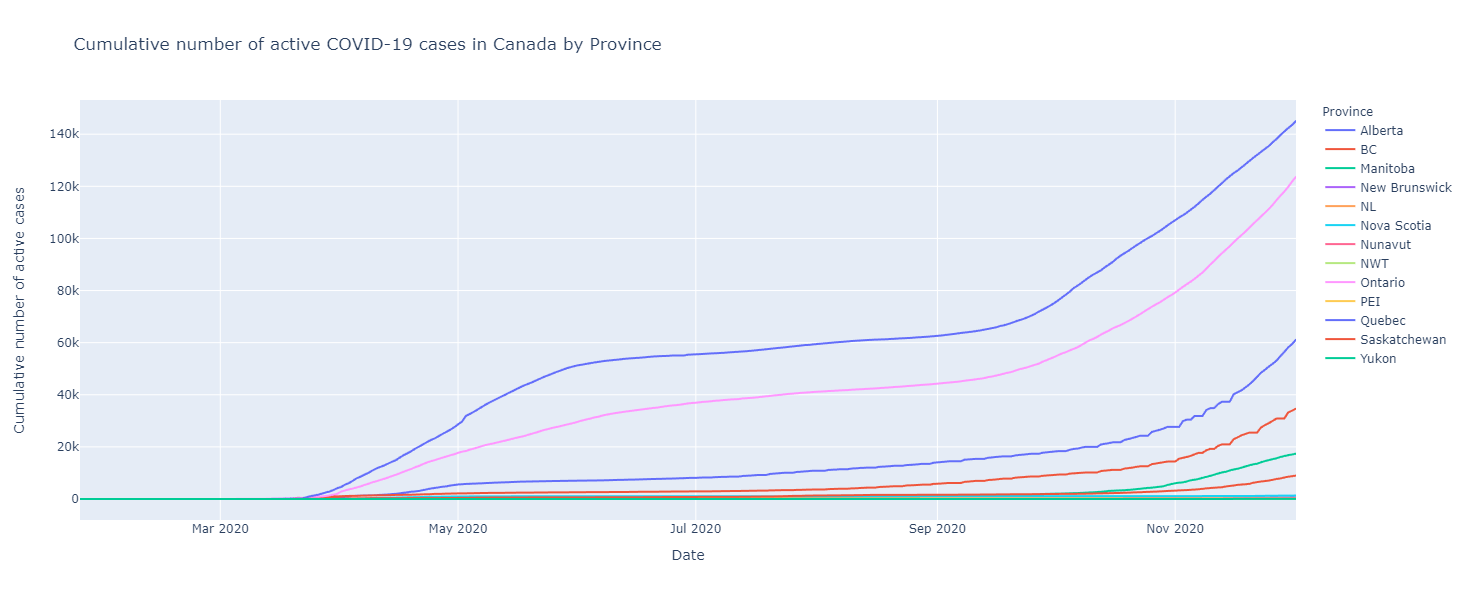

In [28]:
# Plot C_it cumulative active cases for each province
fig = px.line(
    active_cases_provinces,
    x="date",
    y="cumulative_cases",
    color="province",
    title="Cumulative number of active COVID-19 cases in Canada by Province",
    labels=dict(
        date="Date",
        cumulative_cases="Cumulative number of active cases",
        province="Province",
    ),
    height=600,
)
fig.show()

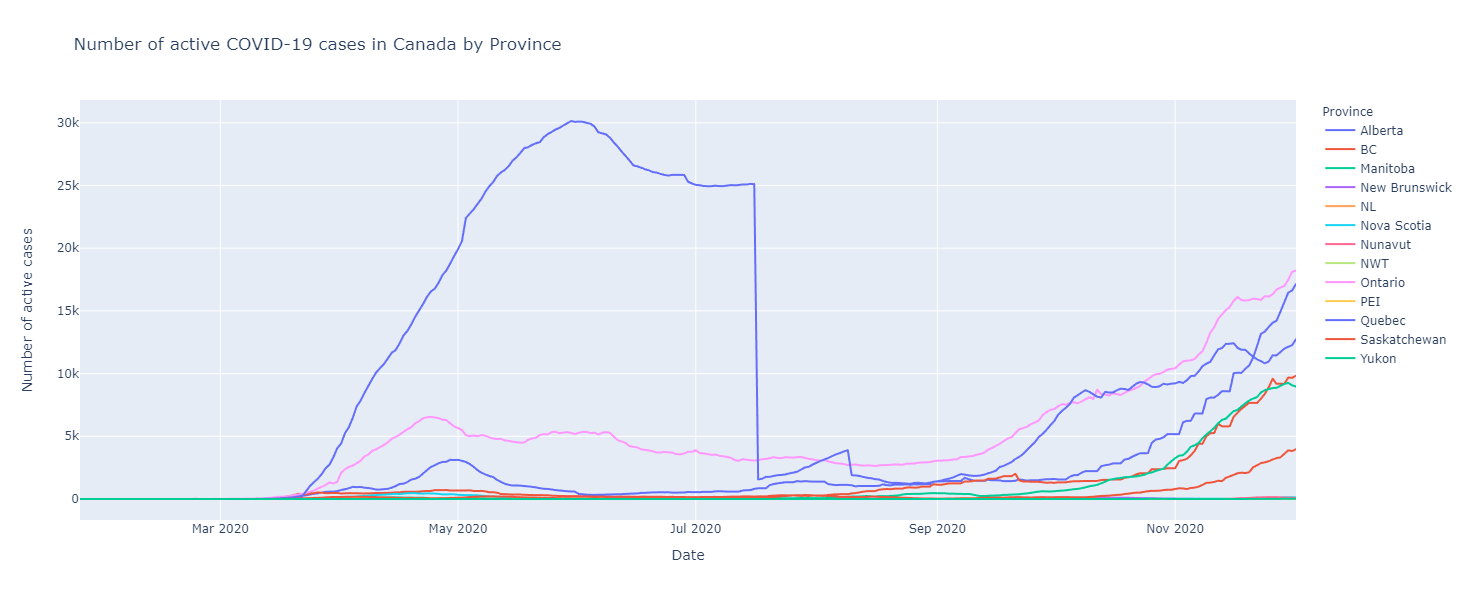

In [32]:
# Plot I_it new cases for each province
fig = px.line(
    active_cases_provinces,
    x="date",
    y="active_cases",
    color="province",
    title="Number of active COVID-19 cases in Canada by Province",
    labels=dict(
        date="Date",
        active_cases="Number of active cases",
        province="Province",
    ),
    height=600,
)
fig.show()

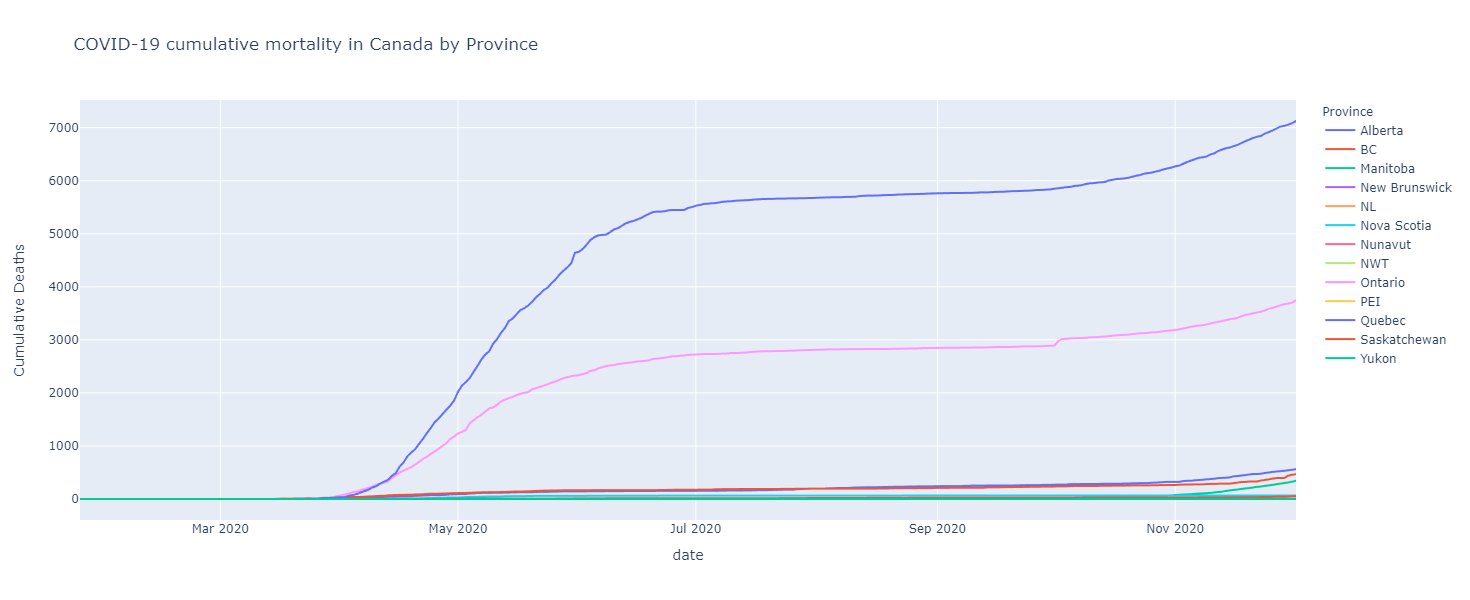

In [30]:
# Cumulative deaths
fig = px.line(
    active_cases_provinces,
    x="date",
    y="cumulative_deaths",
    color="province",
    title="COVID-19 cumulative mortality in Canada by Province",
    labels=dict(
        date_death_report="Date",
        cumulative_deaths="Cumulative Deaths",
        province="Province",
    ),
    height=600,
)
fig.show()

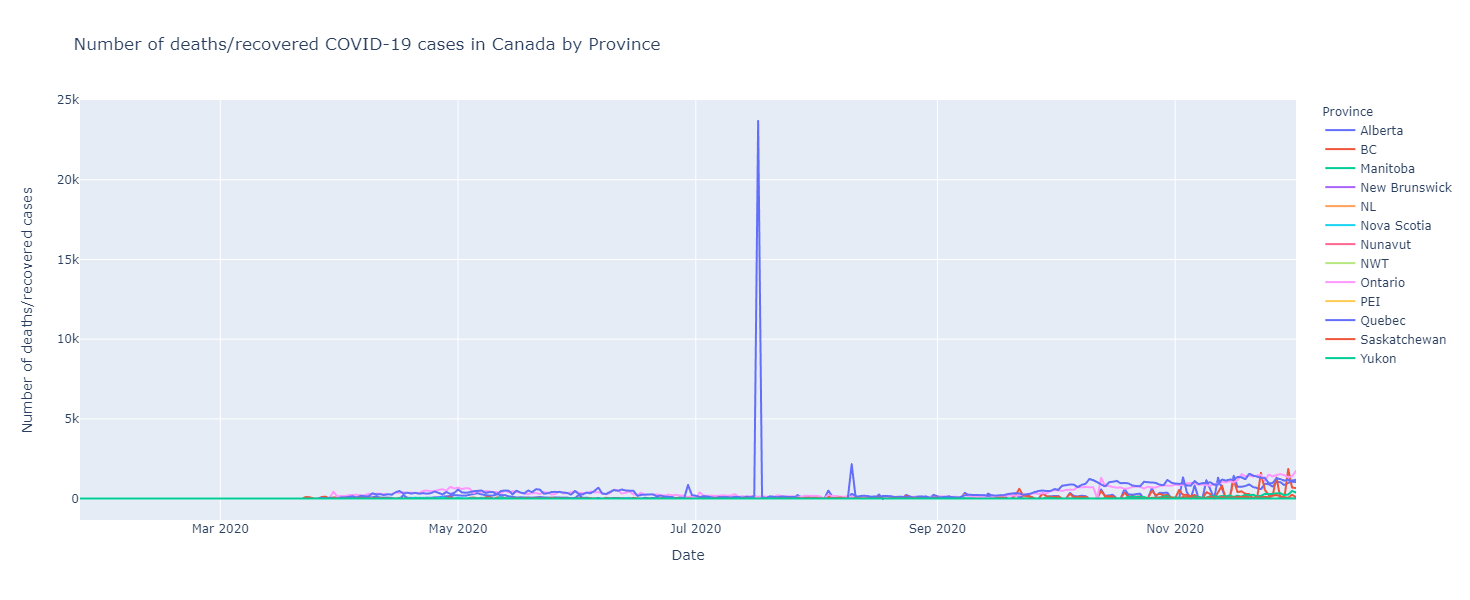

In [31]:
# Plot delta D_it new cases for each province
fig = px.line(
    active_cases_provinces,
    x="date",
    y="removed",
    color="province",
    title="Number of deaths/recovered COVID-19 cases in Canada by Province",
    labels=dict(
        date="Date",
        removed="Number of deaths/recovered cases",
        province="Province",
    ),
    height=600,
)
fig.show()

## Comments

- Seems to be a seasonal component in the $Y_{it}$ plot of about 1 week appearing roughly on Mondays and Tuesdays. This could be that the most testing happens over the weekends and thus the cases are displayed the start of the next week.
- Large dip in active cases in Quebec on July 17 - https://globalnews.ca/news/7190163/canada-coronavirus-cases-july-17/ and https://montreal.ctvnews.ca/quebec-covid-19-recovery-rate-skyrockets-after-new-system-implemented-1.5028344
- Spike in new cases in Quebec on May 3- https://www.cbc.ca/news/canada/montreal/covid-19-quebec-may-3-1.5553881
- It seems like province new case and new deaths/recovered cases time series lines move together and follow a similar pattern
- Warning: Innacurate measurements of new and active cases, recovered, deaths, etc such as this could add too much noise and lead to poor model performance. Might be a good idea to ignore that portion of Quebec and use the latest data instead.
- Mortality data starts March 8, 2020 so we will just ignore all dates before March 1. 
- We will also be ignoring provinces with very few cases as they don't provide much information and predicting covid cases for those provinces is not as important as the major provinces